In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.distance import geodesic

from time import sleep
from tqdm import tqdm
# to see a progress bar
tqdm.pandas()

COLOR_FONT = 'dimgray'
COLOR_PLOT = 'tan'

plt.rcParams.update(
    {
        'figure.figsize': [7, 4],
        'text.color': COLOR_FONT,
        'axes.edgecolor': COLOR_FONT,
        'axes.labelcolor': COLOR_FONT,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.titlecolor': COLOR_FONT,
        'axes.titlesize': 18,
        'xaxis.labellocation': 'left',
        'yaxis.labellocation': 'top',
        'xtick.color': COLOR_FONT,
        'ytick.color': COLOR_FONT,
        'xtick.bottom': False,
        'ytick.left': False,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
    }
)

geolocator = Nominatim(user_agent='my_request')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.2)

### Part 1

#### numeric features

In [21]:
data = pd.read_csv('../data/real_estate_clean_drop_outliers.csv')

data.shape

(9854, 18)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9854 entries, 0 to 9853
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9854 non-null   int64  
 1   price         9854 non-null   int64  
 2   address       9854 non-null   object 
 3   coordinates   9759 non-null   object 
 4   region        9854 non-null   object 
 5   subway        7976 non-null   object 
 6   floor         9854 non-null   int64  
 7   features      9854 non-null   object 
 8   residential   4818 non-null   object 
 9   neighborhood  8932 non-null   object 
 10  description   9854 non-null   object 
 11  detail        9853 non-null   object 
 12  attributes    6458 non-null   object 
 13  num_rooms     9854 non-null   int64  
 14  full_area     9854 non-null   float64
 15  living_area   9854 non-null   float64
 16  kitchen_area  9854 non-null   float64
 17  num_storeys   9854 non-null   int64  
dtypes: float64(3), int64(5), obj

In [23]:
data.describe()

,id,price,floor,num_rooms,full_area,living_area,kitchen_area,num_storeys
count,9.854000e+03,9854.00000,9854.000000,9854.000000,9854.000000,9854.000000,9854.000000,9854.000000
mean,1.136117e+07,36438.05551,9.655774,2.044449,73.835700,40.414411,15.467212,17.078547
std,1.831327e+05,35343.06140,6.629411,0.997334,80.048619,29.167314,9.001417,8.344866
min,7.215847e+06,4000.00000,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000
25%,1.136809e+07,15500.00000,4.000000,1.000000,45.000000,20.000000,10.000000,9.000000
50%,1.140368e+07,25000.00000,8.000000,2.000000,58.000000,32.000000,14.000000,17.000000
75%,1.142454e+07,44600.00000,14.000000,3.000000,86.000000,50.000000,20.000000,25.000000
max,1.144878e+07,428900.00000,36.000000,6.000000,6635.000000,330.000000,140.000000,47.000000


Drop outliers in `full_area`

In [24]:
np.percentile(data['full_area'], 99.5)

270.7350000000006

In [25]:
np.percentile(data['full_area'], 99.9)

400.0

In [26]:
np.percentile(data['full_area'], 99.95)

440.7288000000088

In [27]:
data[data['full_area'] > np.percentile(data['full_area'], 99.95)]

,id,price,address,coordinates,region,subway,floor,features,residential,neighborhood,description,detail,attributes,num_rooms,full_area,living_area,kitchen_area,num_storeys
95,11266938,428900,"Андрія Верхогляда вул. (Драгомирова), 9","30.54658699,50.41012192","Київ,Печерський р-н",Звіринецька,30,['Дизайнерський ремонт'],ЖК Новопечерські Липки,"['Новопечерські липки', 'Бусове поле', 'Чорна ...","В оренду пропонується видовий пентхаус у ЖК ""Н...","В квартирі 5 кімнат. В квартирі є Телевізор, П...",NaN,5,706.0,300.0,50.0,31
2702,11405854,16500,"Воскресенська вул., 12а","30.60243607,50.46797562","Київ,Дніпровський р-н",Дарниця,9,"['Роздільне', 'Хороший стан']",ЖК Паркові Озера,['Парк Перемога'],Пропоную вашій увазі двокімнатну квартиру в ЖК...,В квартирі 2 кімнати. Планування кімнат Розділ...,NaN,2,6635.0,35.0,15.0,25
4683,11229254,121600,"Левка Лук'яненка вул. (Маршала Тимошенка), 29","30.5014019,50.5130043","Київ,Оболонський р-н",Мінська,9,"['Багаторівнева', 'Дизайнерський ремонт']",NaN,"['Оболонь', 'ТРЦ DREAM berry', 'ТРЦ DREAM yell...",Пропонується в оренду 3-х поверховий пентхаус...,В квартирі 6 кімнат. Планування кімнат Багатор...,"['Посудомийна машина', 'Душова кабіна', 'Джаку...",6,500.0,250.0,40.0,11
5152,11233819,202600,"Лесі Українки бульв., 23б","30.54395866,50.42436981","Київ,Печерський р-н",Печерська,19,"['Українська цегла', 'Пентхаус', 'Дизайнерськи...",NaN,"['Царське село', 'Печерськ']","Леси Украинки, 30-Б на 25-26 этажах общей площ...","Будинок - Українська цегла, в квартирі 6 кімна...",NaN,6,600.0,240.0,70.0,20
6888,11256430,324300,"Жилянська вул., 59","30.49960899,50.43771744","Київ,Голосіївський р-н",Університет,16,['Дизайнерський ремонт'],NaN,"['Паньківщина', 'Ботанічний сад ім. акад. О. В...","Здається в оренду розкішний пентхаус в ЖК ""Dip...",В квартирі 5 кімнат. Загальний стан квартири -...,"['Посудомийна машина', 'Душова кабіна', 'Джаку...",5,460.0,200.0,50.0,16


In [28]:
data = data[data['full_area'] < np.percentile(data['full_area'], 99.95)]
data.reset_index(drop=True, inplace=True)

In [29]:
black_list = ['id', 'price']
num_feats = [col for col in data.select_dtypes(include='number') if col not in black_list]
print(f'number of numeric features: {len(num_feats)}')

number of numeric features: 6


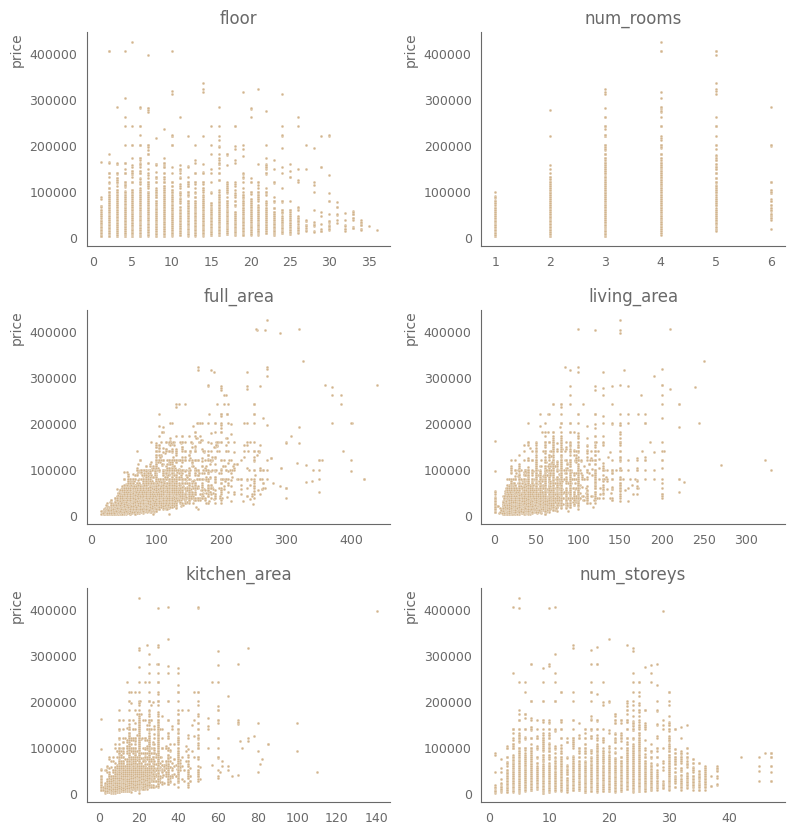

In [30]:
plt.figure(figsize=(9, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for n, col in enumerate(num_feats):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data, x=col, y='price', s=4, color=COLOR_PLOT, ax=ax)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')

plt.show()

In [31]:
data[data['kitchen_area'] > np.percentile(data['kitchen_area'], 99.95)]

,id,price,address,coordinates,region,subway,floor,features,residential,neighborhood,description,detail,attributes,num_rooms,full_area,living_area,kitchen_area,num_storeys
461,11247603,396700,"Андрія Верхогляда вул. (Драгомирова), 7","30.54658699,50.4109726","Київ,Печерський р-н",Звіринецька,7,"['Бетонно монолітний', 'Суміжно-роздільна', 'Д...",ЖК Новопечерські Липки,"['Бусове поле', 'Новопечерські липки', 'Чорна ...",Здається в оренду ексклюзивні апартаменти зага...,"Будинок - Бетонно монолітний, в квартирі 5 кім...","['Лічильники', 'Сигналізація', 'Кондиціонер', ...",5,290.0,150.0,140.0,29
2363,11400948,48200,"Старонаводницька вул., 13","30.54283333,50.42676163","Київ,Печерський р-н",Печерська,8,"['Бетонно монолітний', 'Роздільне', 'Дизайнерс...",NaN,"['Царське село', 'Пологовий будинок № 1', 'Печ...","Старонаводницька вул., 13.\nОренда квартири в ...","Будинок - Бетонно монолітний, в квартирі 4 кім...","['Посудомийна машина', 'Сейф', 'Лічильники', '...",4,170.0,60.0,110.0,22
4606,11339521,93200,"Тургенєвська вул., 44","30.49230194,50.45233154","Київ,Шевченківський р-н",Вокзальна,18,"['Бетонно монолітний', 'Роздільне', 'Дизайнерс...","ЖК на вул. Тургенєвська, 46/11","['Солдатська слобідка', 'Парк ""Павлівський сад...","На престижній Тургенєвській вулиці, 44, розташ...","Будинок - Бетонно монолітний, в квартирі 4 кім...","['Джакузі', 'Сейф', 'Лічильники', 'Супутникове...",4,150.0,20.0,100.0,19
5067,11424812,154000,"Андрія Верхогляда вул. (Драгомирова), 9","30.54658699,50.41012192","Київ,Печерський р-н",Звіринецька,29,"['Суміжно-роздільна', 'Дизайнерський ремонт']",ЖК Новопечерські Липки,"['Новопечерські липки', 'Бусове поле', 'Чорна ...",#1835\nОренда розкішної квартири на 29 поверсі...,В квартирі 3 кімнати. Планування кімнат Суміжн...,"['Душова кабіна', 'Лічильники', 'Кондиціонер',...",3,240.0,40.0,100.0,30


In [32]:
data = data[data['kitchen_area'] < np.percentile(data['kitchen_area'], 99.95)]
data.reset_index(drop=True, inplace=True)

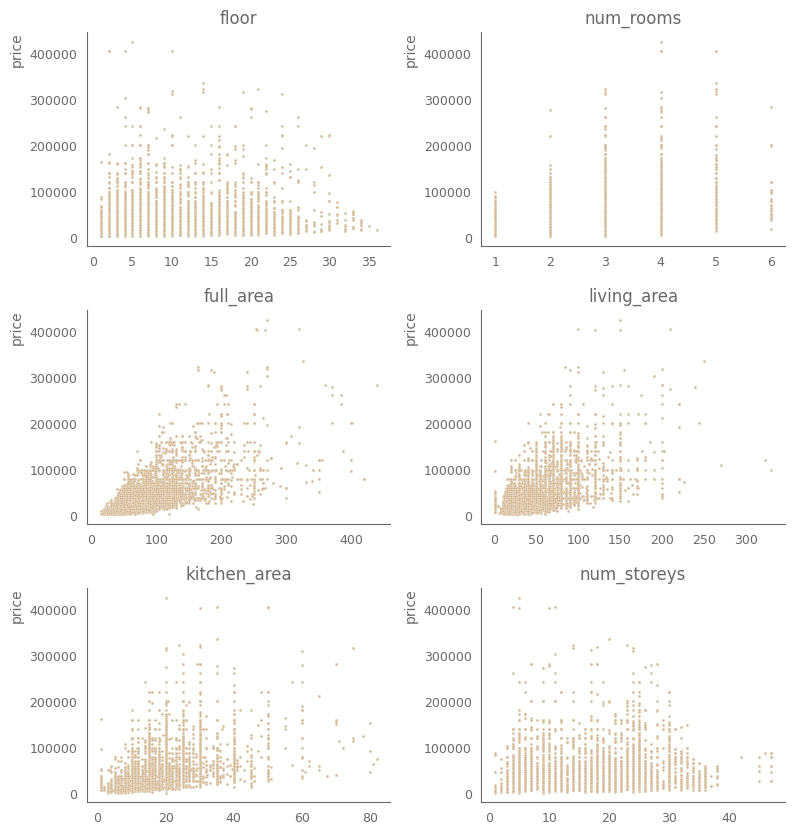

In [33]:
plt.figure(figsize=(9, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for n, col in enumerate(num_feats):
    ax = plt.subplot(3, 2, n + 1)
    sns.scatterplot(data, x=col, y='price', s=4, color=COLOR_PLOT, ax=ax)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')

plt.show()

##### `floor`

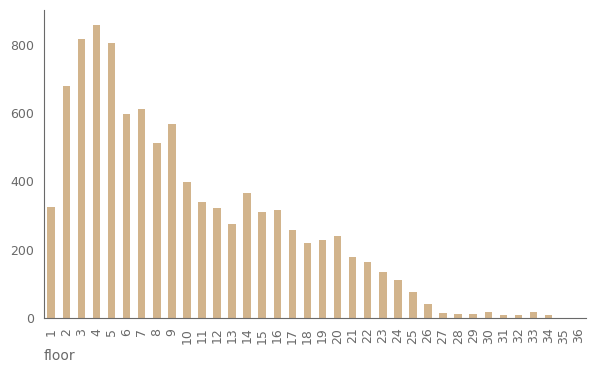

In [34]:
data['floor'].value_counts(dropna=False).sort_index().plot(kind='bar', color=COLOR_PLOT)
plt.show()

Let's create new features: first floor, last floor, one before last floor.

In [35]:
data['first_floor'] = (data['floor'] == 1).astype(int)
data['last_floor'] = (data['floor'] == data['num_storeys']).astype(int)
data['one_before_last_floor'] = (data['floor'] == (data['num_storeys'] - 1)).astype(int)

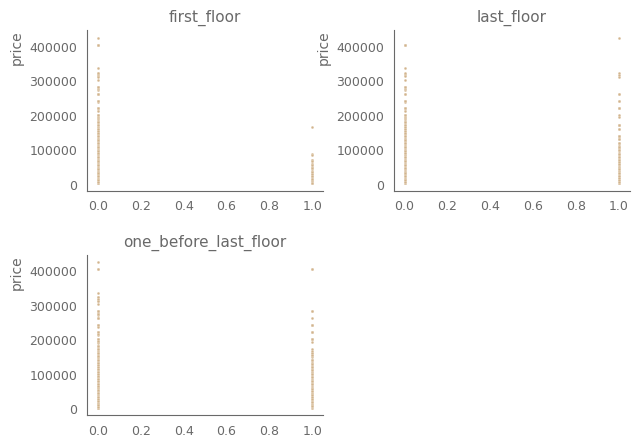

In [36]:
floor_feats = ['first_floor', 'last_floor', 'one_before_last_floor']
plt.figure(figsize=(7, 5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for n, col in enumerate(floor_feats):
    ax = plt.subplot(2, 2, n + 1)
    sns.scatterplot(data, x=col, y='price', s=4, color=COLOR_PLOT, ax=ax)
    ax.set_title(col, fontsize=11)
    ax.set_xlabel('')

plt.show()

In [37]:
data['num_storeys'].value_counts().sort_index()

num_storeys
1       12
2       22
3       59
4      267
5      815
6      227
7      202
8      138
9     1206
10     269
11     126
12     239
13      68
14     185
15     162
16     780
17     179
18     260
19     148
20     235
21     187
22     303
23     366
24     786
25    1587
26     368
27     119
28      39
29      20
30     175
31      39
32      48
33      37
34      64
35      24
36      49
37       3
38      12
42       1
45       4
46       1
47      12
Name: count, dtype: int64

In [38]:
data['floor_per_num_storeys'] = data['floor'] / data['num_storeys']

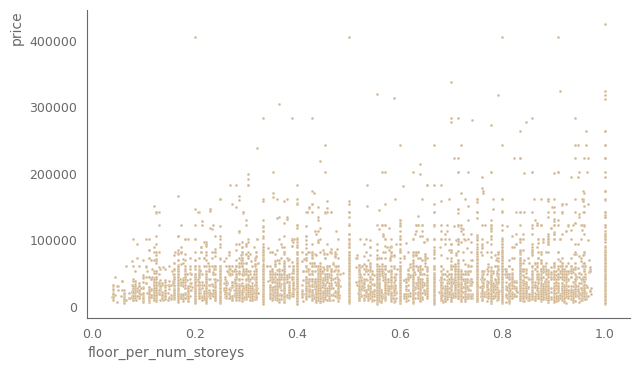

In [39]:
sns.scatterplot(data, x='floor_per_num_storeys', y='price', color=COLOR_PLOT, s=4)
plt.show()

### Part 2
#### `features`, `attributes`

##### `features`
Extract all apartment characteristics from `features`

In [40]:
data.loc[128, 'features']

"['Українська цегла', 'Суміжно-роздільна', 'Євроремонт']"

In [41]:
data.loc[128, 'features'].split("'")

['[', 'Українська цегла', ', ', 'Суміжно-роздільна', ', ', 'Євроремонт', ']']

In [42]:
data.loc[128, 'features'].split("'")[1::2]

['Українська цегла', 'Суміжно-роздільна', 'Євроремонт']

In [43]:
data['features'].str.split("'").str[1::2]

0              [Стара цегла, Роздільне, Задовільний стан]
1                                          [Чудовий стан]
2       [Бетонно монолітний, Роздільне, Дизайнерський ...
3             [Українська цегла, Роздільне, Чудовий стан]
4            [Бетонно монолітний, Роздільне, Перша здача]
                              ...                        
9838    [Сталінка, Суміжно-роздільна, Дизайнерський ре...
9839    [Українська цегла, Суміжно-роздільна, Євроремонт]
9840                    [Роздільне, Дизайнерський ремонт]
9841                               [Дизайнерський ремонт]
9842             [Бетонно монолітний, Студія, Євроремонт]
Name: features, Length: 9843, dtype: object

In [44]:
all_characteristics = set()

def extract_all_characteristics(row):
    for value in row.split("'")[1::2]:
        all_characteristics.add(value.strip())

data['features'].map(extract_all_characteristics)
all_characteristics

{'Євроремонт',
 'Багаторівнева',
 'Бетонно монолітний',
 'Від будівельників (з обробкою)',
 'Від будівельників вільне планування',
 'Газоблок',
 'Дизайнерський ремонт',
 'Дореволюційний',
 'Задовільний стан',
 'Кухня-вітальня',
 'Незавершений ремонт',
 'Пентхаус',
 'Перша здача',
 'Потрібен капітальний ремонт',
 'Потрібен косметичний ремонт',
 'Роздільне',
 'Сталінка',
 'Стара панель',
 'Стара цегла',
 'Студія',
 'Суміжна',
 'Суміжно-роздільна',
 'Типова панель',
 'Українська панель',
 'Українська цегла',
 'Хороший стан',
 'Чудовий стан'}

In [45]:
len(all_characteristics)

27

In [46]:
dict_all_characteristics = {
    'Євроремонт': 'eurorenovation',
    'Багаторівнева': 'multilevel',
    'Бетонно монолітний': 'concrete_monolithic',
    'Від будівельників (з обробкою)': 'from_builders_with_finishing',
    'Від будівельників вільне планування': 'from_builders_free_planning',
    'Газоблок': 'autoclaved_aerated_concrete',
    'Дизайнерський ремонт': 'designer_renovation',
    'Дореволюційний': 'pre_revolutionary',
    'Задовільний стан': 'satisfactory_condition',
    'Кухня-вітальня': 'kitchen_living_room',
    'Незавершений ремонт': 'repair_in_progress',
    'Пентхаус': 'penthouse',
    'Перша здача': 'first_rental',
    'Потрібен капітальний ремонт': 'needs_major_repairs',
    'Потрібен косметичний ремонт': 'needs_cosmetic_repairs',
    'Роздільне': 'separate',
    'Сталінка': 'stalinka',
    'Стара панель': 'old_panel',
    'Стара цегла': 'old_brick',
    'Студія': 'studio',
    'Суміжна': 'adjacent',
    'Суміжно-роздільна': 'adjacent_separate',
    'Типова панель': 'typical_panel',
    'Українська панель': 'ukrainian_panel',
    'Українська цегла': 'ukrainian_brick',
    'Хороший стан': 'good_condition',
    'Чудовий стан': 'excellent_condition',
}

In [47]:
for labels in all_characteristics:
    cat_name = dict_all_characteristics[labels]

    data[cat_name] = data['features'].map(lambda x: int(labels in x))


In [48]:
data.iloc[:, -27:]

,autoclaved_aerated_concrete,adjacent,ukrainian_brick,excellent_condition,old_panel,stalinka,old_brick,pre_revolutionary,designer_renovation,repair_in_progress,...,multilevel,from_builders_free_planning,kitchen_living_room,needs_cosmetic_repairs,separate,ukrainian_panel,good_condition,adjacent_separate,needs_major_repairs,first_rental
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9839,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9840,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9841,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
del data['features']

##### `Attributes`
Extract all attributes from column `attributes` and convert they to columns.

In [50]:
data.loc[~data['attributes'].isna(), 'attributes']

0       ['Душова кабіна', 'Лічильники', 'Мікрохвильовк...
1       ['Душова кабіна', 'Лічильники', 'Кондиціонер',...
2       ['Посудомийна машина', 'Душова кабіна', 'Лічил...
3       ['Посудомийна машина', 'Лічильники', 'Посуд', ...
4       ['Посудомийна машина', 'Душова кабіна', 'Лічил...
                              ...                        
9836    ['Посудомийна машина', 'Душова кабіна', 'Лічил...
9837    ['Кондиціонер', 'Посуд', 'Мікрохвильовка', 'Пр...
9838    ['Душова кабіна', 'Кондиціонер', 'Посуд', 'Мік...
9839    ['Посудомийна машина', 'Кондиціонер', 'Мікрохв...
9842    ['Лічильники', 'Кондиціонер', 'Пральна машина'...
Name: attributes, Length: 6450, dtype: object

In [51]:
data['attributes'].isna().sum()

3393

In [52]:
all_attributes = set()

def extract_all_characteristics(row):
    for value in row.split("'")[1::2]:
        if value == '': continue
        all_attributes.add(value.strip())

data.loc[~data['attributes'].isna(), 'attributes'].map(extract_all_characteristics)
all_attributes

{'DVD програвач',
 'Джакузі',
 'Душова кабіна',
 'Кабельне ТБ',
 'Камін',
 'Кондиціонер',
 'Ліжко',
 'Лічильники',
 'Мікрохвильовка',
 'Посуд',
 'Посудомийна машина',
 'Пральна машина',
 'Праска',
 'Сейф',
 'Сигналізація',
 'Супутникове ТБ',
 'Телевізор',
 'Фен',
 'Холодильник',
 'Шафа'}

In [53]:
len(all_attributes)

20

In [54]:
dict_all_attributes = {
    'DVD програвач': 'DVD_player',
    'Джакузі': 'jacuzzi',
    'Душова кабіна': 'shower_cabin',
    'Камін': 'fireplace',
    'Кондиціонер': 'air_conditioning',
    'Ліжко': 'bed',
    'Лічильники': 'counters',
    'Мікрохвильовка': 'microwave',
    'Посуд': 'dishes',
    'Посудомийна машина': 'dishwashers',
    'Пральна машина': 'washing_machine',
    'Праска': 'iron',
    'Сейф': 'safe',
    'Сигналізація': 'alarms',
    'Телевізор': 'TV',
    'Кабельне ТБ': 'cable_TV',
    'Супутникове ТБ': 'satellite_TV',
    'Фен': 'hair_dryer',
    'Холодильник': 'refrigerator',
    'Шафа': 'wardrobe',
}

In [55]:
for labels in all_attributes:
    cat_name = dict_all_attributes[labels]

    data[cat_name] = data.loc[~data['attributes'].isna(), 'attributes'].map(lambda x: int(labels in x))

In [56]:
data.iloc[:, -20:]

,air_conditioning,shower_cabin,alarms,iron,counters,dishes,microwave,DVD_player,refrigerator,fireplace,bed,hair_dryer,jacuzzi,dishwashers,cable_TV,safe,washing_machine,TV,satellite_TV,wardrobe
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9838,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
9839,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
del data['attributes']

In [58]:
data.to_csv('../data/real_estate_attr.csv', index=False)

### Part 3
#### geoencoding

In [2]:
data = pd.read_csv('../data/real_estate_attr.csv')

#### `region`

In [3]:
data['region'].value_counts(dropna=False)

region
Київ,Печерський р-н        2210
Київ,Шевченківський р-н    1693
Київ,Голосіївський р-н     1300
Київ,Дарницький р-н        1223
Київ,Солом'янський р-н      791
Київ,Дніпровський р-н       700
Київ,Подільський р-н        612
Київ,Оболонський р-н        561
Київ,Святошинський р-н      446
Київ,Деснянський р-н        307
Name: count, dtype: int64

In [4]:
data['region'] = data['region'].str.replace('Київ,', '').str.replace(' р-н', '')
data = data.rename(columns={'region': 'district'})

In [5]:
data['district'].value_counts(dropna=False)

district
Печерський        2210
Шевченківський    1693
Голосіївський     1300
Дарницький        1223
Солом'янський      791
Дніпровський       700
Подільський        612
Оболонський        561
Святошинський      446
Деснянський        307
Name: count, dtype: int64

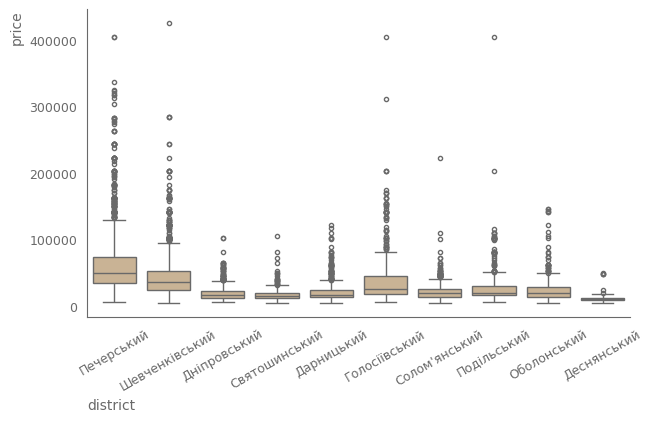

In [6]:
sns.boxplot(x='district', y='price', data=data, color=COLOR_PLOT, fliersize=3)
plt.tick_params('x', labelrotation=30)

plt.show()

In [7]:
df_district_location = pd.read_csv('../data/district_location.csv')

In [8]:
data = data.merge(df_district_location, how='left', on='district')

In [9]:
data[['district', 'district_lat', 'district_lon']]

,district,district_lat,district_lon
0,Печерський,50.428611,30.553056
1,Шевченківський,50.462500,30.461944
2,Печерський,50.428611,30.553056
3,Шевченківський,50.462500,30.461944
4,Печерський,50.428611,30.553056
...,...,...,...
9838,Печерський,50.428611,30.553056
9839,Шевченківський,50.462500,30.461944
9840,Дніпровський,50.456389,30.644167
9841,Подільський,50.489444,30.451944


##### `coordiantes`

In [10]:
data['coordinates'].value_counts(dropna=False)

coordinates
NaN                        95
30.53064728,50.41595459    68
30.59981918,50.39749146    49
30.46647263,50.39138031    45
30.47374153,50.3926506     45
                           ..
30.52749443,50.45143127     1
30.37978745,50.42261887     1
30.63508224,50.41643906     1
30.40856743,50.50588608     1
30.51169968,50.46016312     1
Name: count, Length: 4608, dtype: int64

In [11]:
data[['lon', 'lat']] = (data['coordinates']
                        .str.split(',', expand=True)
                        .apply(pd.to_numeric))

In [12]:
data[['lat', 'lon']]

,lat,lon
0,50.436459,30.517332
1,50.465195,30.428173
2,50.415871,30.527288
3,50.447445,30.494743
4,50.410637,30.535971
...,...,...
9838,50.446217,30.534353
9839,50.450493,30.524725
9840,50.443989,30.603752
9841,50.460163,30.511700


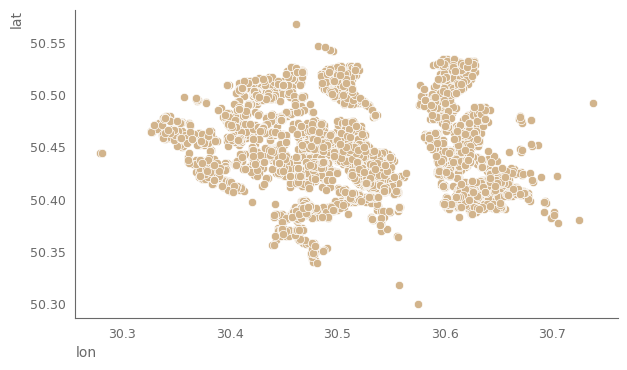

In [13]:
sns.scatterplot(data, x='lon', y='lat', color=COLOR_PLOT)
plt.show()

In [60]:
data['price'].describe()

count      9843.000000
mean      36275.098954
std       34739.528832
min        4000.000000
25%       15500.000000
50%       25000.000000
75%       44600.000000
max      425700.000000
Name: price, dtype: float64

In [26]:
pd.qcut(data['price'], 15).value_counts()

price
(14500.0, 16000.0]      790
(3999.999, 10000.0]     727
(50700.0, 60800.0]      724
(30400.0, 36500.0]      713
(26500.0, 30400.0]      711
(40500.0, 50700.0]      679
(16000.0, 18000.0]      675
(23893.333, 26500.0]    662
(89100.0, 425700.0]     652
(12500.0, 14500.0]      644
(18000.0, 20000.0]      633
(10000.0, 12500.0]      622
(60800.0, 89100.0]      567
(36500.0, 40500.0]      542
(20000.0, 23893.333]    502
Name: count, dtype: int64

In [15]:
pd.qcut(np.log(data['price']), 15, labels=False).value_counts()


price
3     790
0     727
12    724
9     713
8     711
11    679
4     675
7     662
14    652
2     644
5     633
1     622
13    567
10    542
6     502
Name: count, dtype: int64

In [38]:
data_plot = data[['lat', 'lon', 'price']].copy()
data_plot['price_bins'] = pd.cut(np.log(data['price']), 15, labels=False)
data_plot.groupby(by='price_bins')['price'].agg('max')

bins=[min(data['price']) - 1] + data_plot.groupby(by='price_bins')['price'].agg('max').to_list()

data_plot['price_bins'] = pd.cut(data['price'], bins)
data_plot

,lat,lon,price,price_bins
0,50.436459,30.517332,18000,"(13800, 18900]"
1,50.465195,30.428173,16000,"(13800, 18900]"
2,50.415871,30.527288,29200,"(25800, 35300]"
3,50.447445,30.494743,18000,"(13800, 18900]"
4,50.410637,30.535971,30000,"(25800, 35300]"
...,...,...,...,...
9838,50.446217,30.534353,48700,"(48200, 65000]"
9839,50.450493,30.524725,46600,"(35300, 48200]"
9840,50.443989,30.603752,35000,"(25800, 35300]"
9841,50.460163,30.511700,109500,"(89700, 121600]"


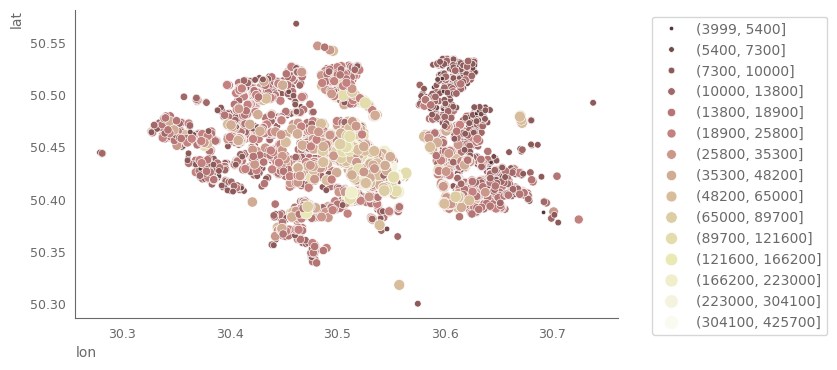

In [59]:
sns.scatterplot(x='lon', y='lat', data=data_plot, hue='price_bins',
                size='price_bins', sizes=(100, 10),
                palette='pink')

plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

#### `address`

In [70]:
data['address'].isna().sum()

0

In [71]:
data['coordinates'].isna().sum()

95

Fill missing value in `coordinates` using geoencoding by `address`.

In [72]:
data_temp = data.loc[data['coordinates'].isna(), ['address', 'district']]
data_temp

,address,district
56,"Волоська вул., 50/38",Подільський
168,"Максимовича вул. (Трутенка Онуфрія), 3г",Голосіївський
281,"Сікорського Ігоря вул. (Танкова), 1а",Шевченківський
308,"Пчілки Олени вул., 5",Дарницький
352,Червоної Калини просп. (Маяковського Володимир...,Деснянський
...,...,...
9363,"Вишняківська вул., 4",Дарницький
9474,"Данила Щербаківського вул. (Щербакова), 56/7",Шевченківський
9483,"Дніпровська наб., 16-Д",Дарницький
9586,"Юрія Пасхаліна вул. (Ілліча), 17",Дарницький


In [73]:
def change_address(address):
    # delete the old street name in brackets
    if '(' in address:
        new_address = address[:address.find('(')-1] + address[address.find(')')+1:]
    else:
        new_address = address

    if 'бульв.' in new_address:
        new_address = new_address.replace(' бульв.', '')
        new_address = f"бульвар {new_address}, Київ"
    elif 'вул.' in new_address:
        new_address = new_address.replace(' вул.', '')
        new_address = f"вулиця {new_address}, Київ"
    elif 'просп.' in new_address:
        new_address = new_address.replace(' просп.', '')
        new_address = f"проспект {new_address}, Київ"
    else:
        new_address = f"{new_address}, Київ"

    return new_address

In [74]:
data_temp['location'] = (data_temp['address']
                         .apply(change_address)
                         .progress_apply(geocode))
data_temp

100%|██████████| 95/95 [01:54<00:00,  1.20s/it]


,address,district,location
56,"Волоська вул., 50/38",Подільський,"(Моя сім’я, 50/38, Волоська вулиця, Плоське, П..."
168,"Максимовича вул. (Трутенка Онуфрія), 3г",Голосіївський,"(3-Г, вулиця Михайла Максимовича, Голосіїв, Го..."
281,"Сікорського Ігоря вул. (Танкова), 1а",Шевченківський,"(1-А, вулиця Авіаконструктора Ігоря Сікорськог..."
308,"Пчілки Олени вул., 5",Дарницький,"(5, вулиця Олени Пчілки, 4-й «А» мікрорайон По..."
352,Червоної Калини просп. (Маяковського Володимир...,Деснянський,"(16-А, проспект Червоної Калини, Вигурівщина-Т..."
...,...,...,...
9363,"Вишняківська вул., 4",Дарницький,"(4, Вишняківська вулиця, 11-й мікрорайон, Осок..."
9474,"Данила Щербаківського вул. (Щербакова), 56/7",Шевченківський,"(вулиця Данила Щербаківського, Урочище Вовча Г..."
9483,"Дніпровська наб., 16-Д",Дарницький,"(Дніпровська набережна, Дарницький район, Київ..."
9586,"Юрія Пасхаліна вул. (Ілліча), 17",Дарницький,"(17, вулиця Юрія Пасхаліна, Нова Дарниця, Дарн..."


In [75]:
data_temp['lat'] = (data_temp.apply(
    lambda x: x['location'].latitude if (x['location']) and (x['district'].replace("'", "’") in str(x['location'])) else None, axis=1))
data_temp['lon'] = (data_temp.apply(
    lambda x: x['location'].longitude if (x['location']) and (x['district'].replace("'", "’") in str(x['location'])) else None, axis=1))

data_temp

,address,district,location,lat,lon
56,"Волоська вул., 50/38",Подільський,"(Моя сім’я, 50/38, Волоська вулиця, Плоське, П...",50.471924,30.513150
168,"Максимовича вул. (Трутенка Онуфрія), 3г",Голосіївський,"(3-Г, вулиця Михайла Максимовича, Голосіїв, Го...",50.391682,30.480043
281,"Сікорського Ігоря вул. (Танкова), 1а",Шевченківський,"(1-А, вулиця Авіаконструктора Ігоря Сікорськог...",50.463391,30.432432
308,"Пчілки Олени вул., 5",Дарницький,"(5, вулиця Олени Пчілки, 4-й «А» мікрорайон По...",50.415583,30.631625
352,Червоної Калини просп. (Маяковського Володимир...,Деснянський,"(16-А, проспект Червоної Калини, Вигурівщина-Т...",50.505261,30.603881
...,...,...,...,...,...
9363,"Вишняківська вул., 4",Дарницький,"(4, Вишняківська вулиця, 11-й мікрорайон, Осок...",50.394096,30.651756
9474,"Данила Щербаківського вул. (Щербакова), 56/7",Шевченківський,"(вулиця Данила Щербаківського, Урочище Вовча Г...",50.468132,30.405851
9483,"Дніпровська наб., 16-Д",Дарницький,"(Дніпровська набережна, Дарницький район, Київ...",50.409965,30.600748
9586,"Юрія Пасхаліна вул. (Ілліча), 17",Дарницький,"(17, вулиця Юрія Пасхаліна, Нова Дарниця, Дарн...",50.425686,30.651920


In [76]:
data = data.fillna(data_temp)

In [77]:
data['lat'].isna().sum()

12

Use transfrom method for fill missing value in `lat` and `lon` columns.

In [78]:
data['lat'] = data['lat'].fillna(data.groupby(['district'])['lat'].transform('mean'))
data['lon'] = data['lon'].fillna(data.groupby(['district'])['lon'].transform('mean'))

print(data['lat'].isna().sum(), data['lon'].isna().sum())

0 0


In [79]:
data.to_csv('../data/real_estate_geo.csv', index=False)

#### `subway`

In [80]:
data = pd.read_csv('../data/real_estate_geo.csv')
data.shape

(9843, 71)

In [81]:
data['subway'].value_counts(dropna=False)

subway
NaN                         1878
Звіринецька                  594
Вокзальна                    388
Лук'янівська                 384
Либідська                    374
Палац Україна                370
Позняки                      294
Печерська                    291
Золоті Ворота                291
Осокорки                     262
Лівобережна                  254
Олімпійська                  236
Васильківська                207
Університет                  193
Кловська                     185
Деміївська                   184
Контрактова площа            166
Славутич                     165
Нивки                        158
Шулявська                    156
Харківська                   153
Політехнічний інститут       151
Виставковий центр            151
Оболонь                      143
Сирець                       142
Хрещатик                     138
Академмістечко               131
Видубичі                     126
Мінська                      123
Голосіївська                 120
Іпо

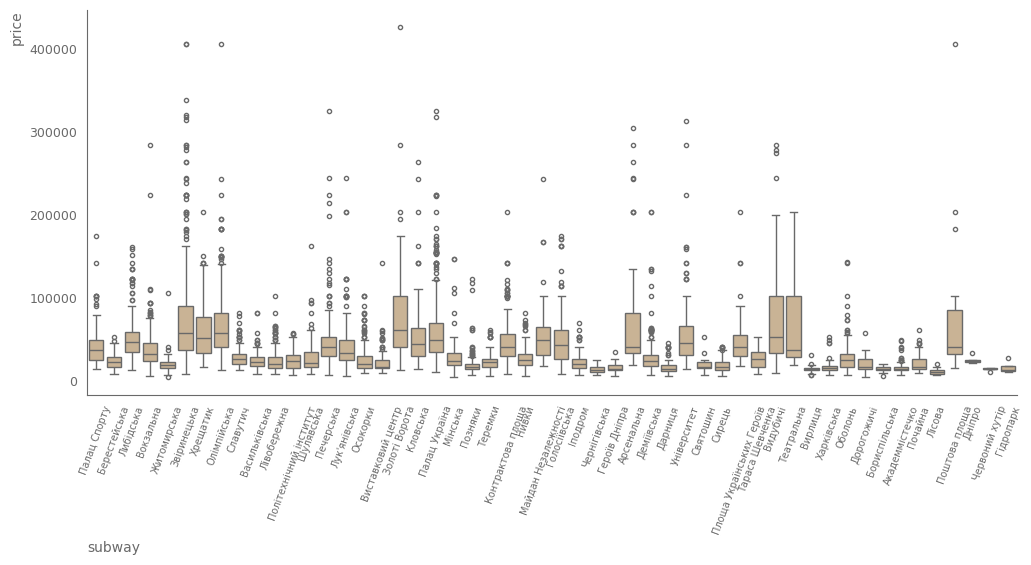

In [108]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='subway', y='price', data=data, color=COLOR_PLOT, fliersize=3)
plt.tick_params('x', labelrotation=70, labelsize=7)

plt.show()

In [82]:
df_subway_location = pd.read_csv('../data/subway_location.csv')

In [83]:
data = data.merge(df_subway_location, how='left', on='subway')
data[['subway', 'subway_lat', 'subway_lon']]

,subway,subway_lat,subway_lon
0,Палац Спорту,50.439329,30.429925
1,Берестейська,50.459318,30.414516
2,Либідська,50.413014,30.524606
3,Вокзальна,50.441339,30.487388
4,Либідська,50.413014,30.524606
...,...,...,...
9838,Арсенальна,50.443986,30.544114
9839,Майдан Незалежності,50.448126,30.522429
9840,Лівобережна,50.450854,30.595138
9841,Контрактова площа,50.464413,30.514525


In [84]:
data.to_csv('../data/real_estate_geo_subway.csv', index=False)

### Part 4
#### distances

In [85]:
data = pd.read_csv('../data/real_estate_geo_subway.csv')

In [61]:
# def get_dist_to_subway(adr_loc, subway_loc):
#     try:
#         return geodesic(adr_loc, subway_loc).kilometers
#     except ValueError:
#         return None

# data['dist_to_subway'] = data.progress_apply(lambda x:
#                                              get_dist_to_subway((x['lat'], x['lon']),
#                                                                 (x['subway_lat'], x['subway_lon'])),
#                                              axis=1)

100%|██████████| 8249/8249 [00:01<00:00, 5634.89it/s]


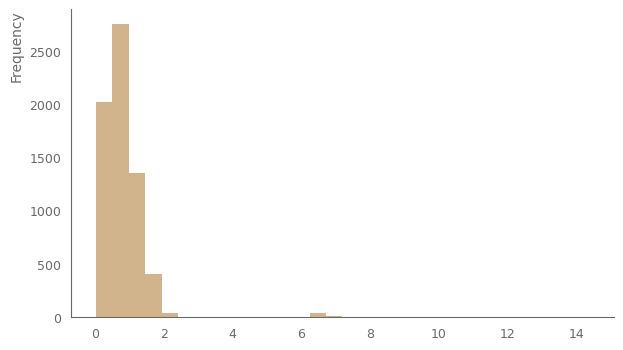

In [62]:
# data['dist_to_subway'].plot(kind='hist', bins=30, color=COLOR_PLOT)
# plt.show()

In [86]:
df_subway_location = pd.read_csv('../data/subway_location.csv')

In [87]:
def get_min_dist_to_subway(adr_loc, df_subway_location):
    df_subway_location['lat_lon'] = list(zip(df_subway_location['subway_lat'],
                                             df_subway_location['subway_lon']))

    dists = df_subway_location['lat_lon'].apply(lambda x: geodesic(adr_loc, x).kilometers)
    return min(dists)

data['min_dist_to_subway'] = data.progress_apply(
    lambda x: get_min_dist_to_subway((x['lat'], x['lon']),
                                     df_subway_location), axis=1)


100%|██████████| 9843/9843 [06:34<00:00, 24.95it/s]


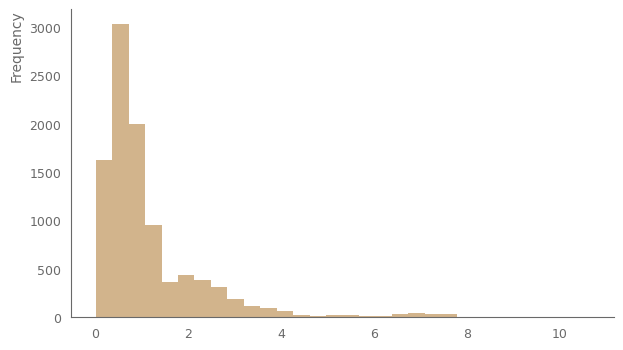

In [88]:
data['min_dist_to_subway'].plot(kind='hist', bins=30, color=COLOR_PLOT)
plt.show()

##### Distance to Kyiv center

In [89]:
centre_loc = (50.450555, 30.5206892) # geo of Kyiv centre
centre_loc

(50.450555, 30.5206892)

In [90]:
def get_dist_to_center(adr_loc):
    return geodesic(adr_loc, centre_loc).kilometers

In [91]:
data['dist_to_center'] = (data.progress_apply(
    lambda x: get_dist_to_center((x['lat'], x['lon'])), axis=1))

100%|██████████| 9843/9843 [00:10<00:00, 910.38it/s] 


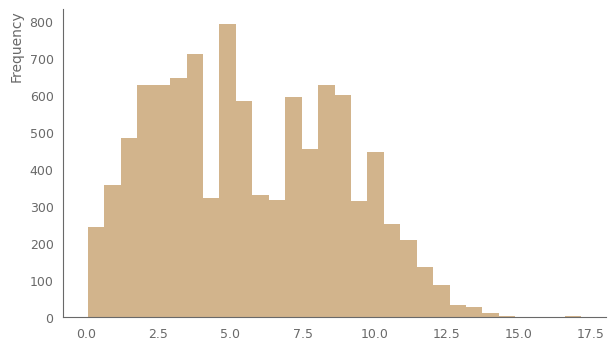

In [92]:
data['dist_to_center'].plot(kind='hist', bins=30, color=COLOR_PLOT)
plt.show()

In [93]:
data.to_csv('../data/real_estate_geo_dist.csv', index=False)

### Part 5

#### Additional features

In [94]:
data = pd.read_csv('../data/real_estate_geo_dist.csv')


Fill attributes columns with information from `detail` and `description` columns.

In [95]:
attr_dict = {
    'DVD_player': ['DVD'],
    'jacuzzi': ['джакуз'],
    'shower_cabin': ['душова', 'душев'],
    'fireplace': ['камін', 'камин'],
    'air_conditioning': ['кондиц'],
    'bed': ['ліжк', 'кроват'],
    'counters': ['лічильник', 'счетчик'],
    'microwave': ['мікрохвил', 'микроволн'],
    'dishwashers': ['посудомий', 'посудомо'],
    'washing_machine': ['пральна', 'стиральн'],
    'iron': ['праска', 'утюг'],
    'safe' : ['сейф'],
    'alarms': ['сигналізац', 'сигнализац'],
    'TV': ['телевізор', 'тв', 'телевизор'],
    'cable_TV': ['кабельн'],
    'satellite_TV': ['супутникове', 'спутников'],
    'hair_dryer': ['фен'],
    'refrigerator': ['холодильник'],
    'wardrobe': ['шаф', 'шкаф'],
}


In [96]:
data[['DVD_player', 'washing_machine',
       'dishes', 'jacuzzi', 'hair_dryer', 'counters', 'alarms', 'TV',
       'microwave', 'satellite_TV', 'air_conditioning', 'wardrobe',
       'refrigerator', 'bed', 'fireplace', 'cable_TV', 'shower_cabin', 'safe',
       'dishwashers', 'iron']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DVD_player        6450 non-null   float64
 1   washing_machine   6450 non-null   float64
 2   dishes            6450 non-null   float64
 3   jacuzzi           6450 non-null   float64
 4   hair_dryer        6450 non-null   float64
 5   counters          6450 non-null   float64
 6   alarms            6450 non-null   float64
 7   TV                6450 non-null   float64
 8   microwave         6450 non-null   float64
 9   satellite_TV      6450 non-null   float64
 10  air_conditioning  6450 non-null   float64
 11  wardrobe          6450 non-null   float64
 12  refrigerator      6450 non-null   float64
 13  bed               6450 non-null   float64
 14  fireplace         6450 non-null   float64
 15  cable_TV          6450 non-null   float64
 16  shower_cabin      6450 non-null   float64


In [97]:
def add_attributes(row):
    for col_name, attr_list in attr_dict.items():
        for attr in attr_list:
            if np.isnan(data.loc[row, 'counters']):
                if ((attr.lower() in data.loc[row, 'detail'].lower())
                    or (attr.lower() in data.loc[row, 'description'].lower())):
                    data.loc[row, col_name] = 1

for row in tqdm(range(len(data))):
    add_attributes(row)

data[['DVD_player', 'washing_machine',
       'dishes', 'jacuzzi', 'hair_dryer', 'counters', 'alarms', 'TV',
       'microwave', 'satellite_TV', 'air_conditioning', 'wardrobe',
       'refrigerator', 'bed', 'fireplace', 'cable_TV', 'shower_cabin', 'safe',
       'dishwashers', 'iron']].info()

100%|██████████| 9843/9843 [00:46<00:00, 212.61it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DVD_player        6463 non-null   float64
 1   washing_machine   7273 non-null   float64
 2   dishes            6450 non-null   float64
 3   jacuzzi           6520 non-null   float64
 4   hair_dryer        6466 non-null   float64
 5   counters          7224 non-null   float64
 6   alarms            6547 non-null   float64
 7   TV                7523 non-null   float64
 8   microwave         6861 non-null   float64
 9   satellite_TV      6459 non-null   float64
 10  air_conditioning  7773 non-null   float64
 11  wardrobe          7257 non-null   float64
 12  refrigerator      7215 non-null   float64
 13  bed               7328 non-null   float64
 14  fireplace         6541 non-null   float64
 15  cable_TV          6776 non-null   float64
 16  shower_cabin      6732 non-null   float64


In [122]:
data.to_csv('../data/real_estate_geo_dist_attr.csv', index=False)

Create additional features, such as `parking`, `security`

In [ ]:
data.columns

Index(['id', 'price', 'address', 'coordinates', 'district', 'subway', 'floor',
       'residential', 'neighborhood', 'description', 'detail', 'num_rooms',
       'full_area', 'living_area', 'kitchen_area', 'num_storeys',
       'first_floor', 'last_floor', 'one_before_last_floor',
       'floor_per_num_storeys', 'ukrainian_panel',
       'from_builders_free_planning', 'studio', 'ukrainian_brick',
       'autoclaved_aerated_concrete', 'needs_major_repairs',
       'satisfactory_condition', 'adjacent', 'old_brick', 'first_rental',
       'repair_in_progress', 'old_panel', 'eurorenovation', 'good_condition',
       'kitchen_living_room', 'needs_cosmetic_repairs', 'separate',
       'excellent_condition', 'adjacent_separate',
       'from_builders_with_finishing', 'multilevel', 'penthouse',
       'typical_panel', 'concrete_monolithic', 'designer_renovation',
       'pre_revolutionary', 'stalinka', 'DVD_player', 'washing_machine',
       'dishes', 'jacuzzi', 'hair_dryer', 'counters', 'alar

#### `residential`

In [ ]:
data['residential'].value_counts(dropna=False)

residential
NaN                            3730
ЖК Новопечерські Липки          215
ЖК Французький квартал 2        137
ЖК Нова Англія                   81
ЖК Park Avenue VIP               77
                               ... 
ЖК Златоустівська 14-18           1
ЖК Коломийський                   1
ЖК Chalet                         1
ЖК на пров. Моторний, 9, 9а       1
ЖК 044                            1
Name: count, Length: 381, dtype: int64

#### `neighborhood`

In [ ]:
data['neighborhood'].value_counts(dropna=False)

neighborhood
NaN                                                                                                    692
['ТЦ Ocean Plaza']                                                                                     171
['ТЦ "Інтервал-Плаза"', 'ТЦ Ocean Plaza']                                                              139
['ТЦ River Mall']                                                                                      130
['Новопечерські липки', 'Бусове поле', 'Чорна гора']                                                   109
                                                                                                      ... 
['Звіринець', 'Бусове поле', 'Національний ботанічний сад ім. М. М. Гришка', 'Новопечерські липки']      1
['Райдужний', 'Воскресенський масив', 'Русанівські сади']                                                1
['Бабин Яр', 'Куренівка']                                                                                1
['Старий Київ', 'Львівсь

In [112]:
data.columns

Index(['id', 'price', 'address', 'coordinates', 'district', 'subway', 'floor',
       'residential', 'neighborhood', 'description', 'detail', 'num_rooms',
       'full_area', 'living_area', 'kitchen_area', 'num_storeys',
       'first_floor', 'last_floor', 'one_before_last_floor',
       'floor_per_num_storeys', 'autoclaved_aerated_concrete', 'adjacent',
       'ukrainian_brick', 'excellent_condition', 'old_panel', 'stalinka',
       'old_brick', 'pre_revolutionary', 'designer_renovation',
       'repair_in_progress', 'eurorenovation', 'typical_panel',
       'satisfactory_condition', 'concrete_monolithic', 'studio', 'penthouse',
       'from_builders_with_finishing', 'multilevel',
       'from_builders_free_planning', 'kitchen_living_room',
       'needs_cosmetic_repairs', 'separate', 'ukrainian_panel',
       'good_condition', 'adjacent_separate', 'needs_major_repairs',
       'first_rental', 'air_conditioning', 'shower_cabin', 'alarms', 'iron',
       'counters', 'dishes', 'microwav